Datos iniciales:
    magnitud  profundidad  region  duracion  distancia_epicentro  \
0       5.1           35   Norte        25                   10   
1       6.3           60  Centro        40                   50   
2       4.8           15     Sur        18                   20   
3       7.0           90  Centro        60                  100   
4       5.6           50     Sur        35                   40   
5       6.8           70   Norte        55                   80   
6       4.5           10  Centro        15                   15   
7       5.9           40   Norte        45                   60   
8       7.2          100     Sur        70                  120   
9       6.1           55  Centro        38                   45   

   danos_reportados  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  
5                 1  
6                 0  
7                 1  
8                 1  
9                 1  


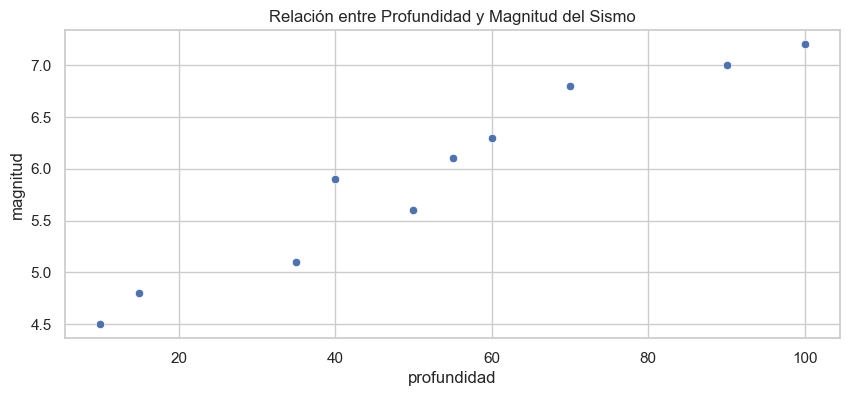

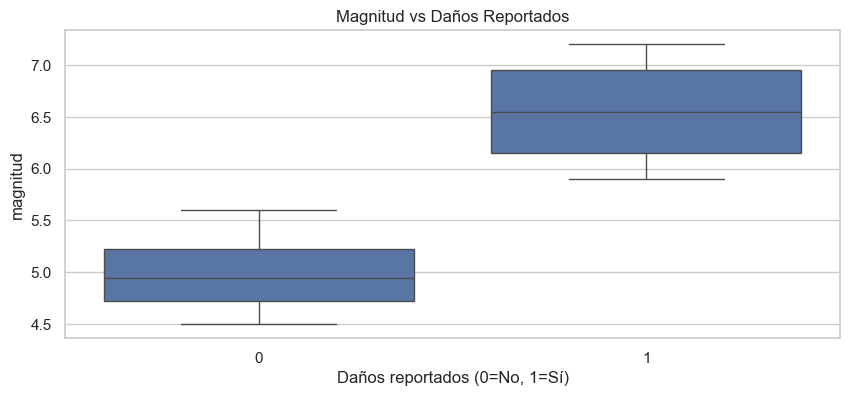


Regresión Lineal Simple:
Coeficiente: 0.03082658022690436
Intercepto: 4.311604538087522
Ecuación: magnitud = 4.31 + (0.0308) * profundidad


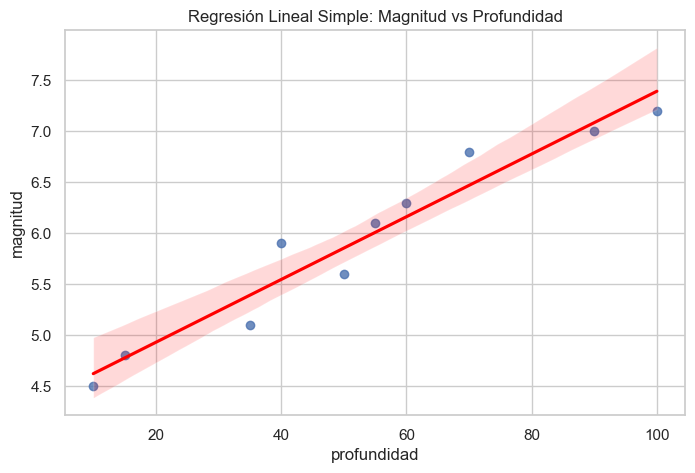


Regresión Lineal Múltiple:
Coeficientes: [ 1.38499525e+00 -2.82358105e-02 -1.29007651e-03]
Intercepto: -6.060977661468199
Ecuación: daños = -6.06 + (1.385)*magnitud + (-0.028)*profundidad + (-0.001)*distancia_epicentro

Resultados con predicción de daños:
   magnitud  profundidad  distancia_epicentro  danos_reportados  \
0       5.1           35                   10                 0   
1       6.3           60                   50                 1   
2       4.8           15                   20                 0   
3       7.0           90                  100                 1   
4       5.6           50                   40                 0   
5       6.8           70                   80                 1   
6       4.5           10                   15                 0   
7       5.9           40                   60                 1   
8       7.2          100                  120                 1   
9       6.1           55                   45                 1   

   pr

In [1]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    'magnitud': [5.1, 6.3, 4.8, 7.0, 5.6, 6.8, 4.5, 5.9, 7.2, 6.1],
    'profundidad': [35, 60, 15, 90, 50, 70, 10, 40, 100, 55],
    'region': ['Norte', 'Centro', 'Sur', 'Centro', 'Sur', 'Norte', 'Centro', 'Norte', 'Sur', 'Centro'],
    'duracion': [25, 40, 18, 60, 35, 55, 15, 45, 70, 38],
    'distancia_epicentro': [10, 50, 20, 100, 40, 80, 15, 60, 120, 45],
    'danos_reportados': [0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
print("Datos iniciales:\n", df)


sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))
sns.scatterplot(x='profundidad', y='magnitud', data=df)
plt.title('Relación entre Profundidad y Magnitud del Sismo')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='danos_reportados', y='magnitud', data=df)
plt.title('Magnitud vs Daños Reportados')
plt.xlabel('Daños reportados (0=No, 1=Sí)')
plt.show()


X_simple = df[['profundidad']]
y_simple = df['magnitud']

modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_simple)

print("\nRegresión Lineal Simple:")
print("Coeficiente:", modelo_simple.coef_[0])
print("Intercepto:", modelo_simple.intercept_)
print(f"Ecuación: magnitud = {modelo_simple.intercept_:.2f} + ({modelo_simple.coef_[0]:.4f}) * profundidad")

plt.figure(figsize=(8, 5))
sns.regplot(x='profundidad', y='magnitud', data=df, line_kws={'color': 'red'})
plt.title('Regresión Lineal Simple: Magnitud vs Profundidad')
plt.show()


X_multi = df[['magnitud', 'profundidad', 'distancia_epicentro']]
y_multi = df['danos_reportados']

modelo_multi = LinearRegression()
modelo_multi.fit(X_multi, y_multi)

print("\nRegresión Lineal Múltiple:")
print("Coeficientes:", modelo_multi.coef_)
print("Intercepto:", modelo_multi.intercept_)
print(f"Ecuación: daños = {modelo_multi.intercept_:.2f} + ({modelo_multi.coef_[0]:.3f})*magnitud + "
      f"({modelo_multi.coef_[1]:.3f})*profundidad + ({modelo_multi.coef_[2]:.3f})*distancia_epicentro")

df['prediccion_danos'] = modelo_multi.predict(X_multi)
print("\nResultados con predicción de daños:")
print(df[['magnitud', 'profundidad', 'distancia_epicentro', 'danos_reportados', 'prediccion_danos']])
